#Load the dataset

In [ ]:
import pandas as pd
df= pd.read_csv('/content/Customer-Churn-Prediction - Customer-Churn-Prediction.csv')

In [ ]:
df.head() #ISP Company

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.drop('customerID',axis=1,inplace=True)

In [ ]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Churn'>

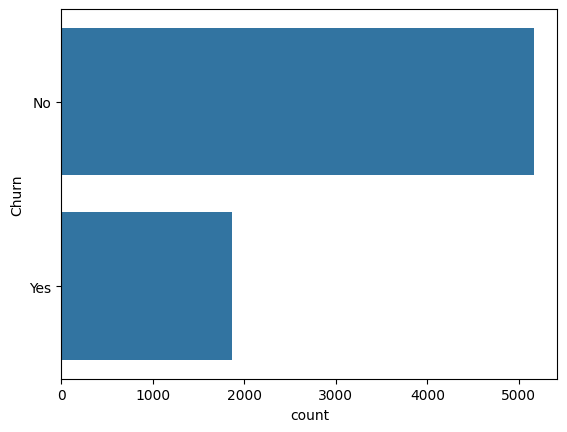

In [ ]:
import seaborn as sns
sns.countplot(df['Churn'])

#Encode the dataset

In [ ]:
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()

In [ ]:
from pandas.core.dtypes.common import is_numeric_dtype

for x in df.columns:
  if is_numeric_dtype(df[x]):
    continue     # Skip numeric columns
  else:
    df[x]= label.fit_transform(df[x])

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


#Separate train and test part

In [ ]:
x= df.drop('Churn',axis=1)
y= df['Churn']

In [ ]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

#Imbalanced Data Handling

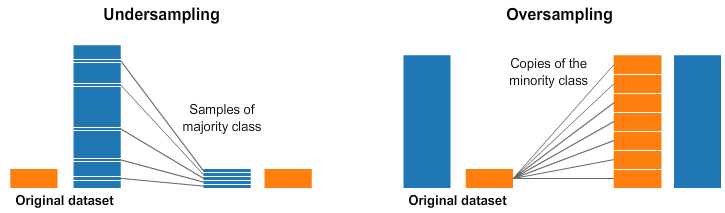

In [ ]:
from IPython.display import Image
Image('/content/resampling.png')

# SMOTETomek: Synthetic Minority Oversampling Technique with Tomek Links





SMOTETomek is a hybrid technique that combines SMOTE (Synthetic Minority Over-sampling Technique) and Tomek Links to address the issue of imbalanced datasets.

## SMOTE (Synthetic Minority Over-sampling Technique)

1. **Purpose**: SMOTE aims to balance the dataset by increasing the number of minority class samples.

2. **Process**:
   - **Selection**: For each minority class sample, k-nearest neighbors are identified.
   - **Synthetic Sample Generation**: New synthetic samples are created by interpolating between the selected minority class sample and its k-nearest neighbors. This is done by taking a random point along the line segment between the two samples in feature space.
   - **Repetition**: This process is repeated until the minority class is sufficiently oversampled to balance the dataset.

## Tomek Links

1. **Purpose**: Tomek Links aim to clean the dataset by removing samples that are too close to each other and belong to different classes. This helps in reducing the overlap between classes and enhances the decision boundary.

2. **Process**:
   - **Identification of Tomek Links**: A pair of samples (one from the minority class and one from the majority class) are identified as a Tomek Link if they are each other’s nearest neighbors.
   - **Removal**: The identified Tomek Links are then removed from the dataset, which helps in making the classes more distinct.

## SMOTETomek

SMOTETomek combines the strengths of both SMOTE and Tomek Links to create a more balanced and cleaner dataset.

### Step-by-Step Process:
1. **SMOTE Application**: First, SMOTE is applied to the dataset to oversample the minority class by generating synthetic samples.
2. **Tomek Links Removal**: Next, Tomek Links are applied to the newly created dataset (including the synthetic samples) to remove samples that are too close to each other and belong to different classes.

### Outcome:
- The dataset becomes more balanced with an increased number of minority class samples due to SMOTE.
- The dataset also becomes cleaner with reduced overlap between classes due to the removal of Tomek Links, leading to potentially better performance of machine learning algorithms.

### Benefits of SMOTETomek
- **Balanced Dataset**: By oversampling the minority class, SMOTETomek ensures that the dataset is balanced, which helps in improving the performance of machine learning models.
- **Reduced Overlap**: By removing Tomek Links, it reduces the overlap between classes, which can enhance the model’s ability to discriminate between classes.
- **Improved Decision Boundaries**: The combined effect of SMOTE and Tomek Links can lead to cleaner decision boundaries and better generalization of the model.

## Example Workflow

### Original Dataset:
- Minority class: 100 samples
- Majority class: 1000 samples

### After SMOTE:
- Synthetic samples added to minority class: 900 samples
- Total samples for minority class: 100 + 900 = 1000 samples

### After Tomek Links:
- Some samples from both classes (that form Tomek Links) are removed.
- Final dataset: Balanced and cleaner.

`Note:` The exact final shape of the dataset after applying SMOTETomek is not fixed and can vary depending on the specific characteristics of the dataset and how many Tomek Links are identified and removed.



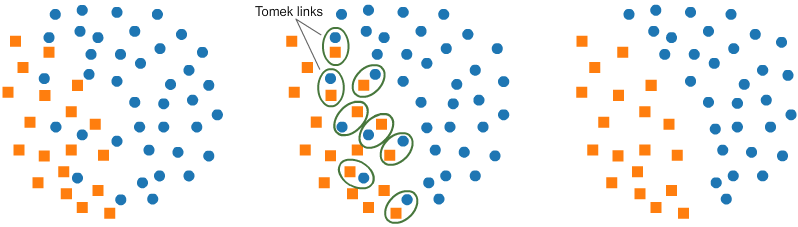

In [ ]:
from IPython.display import Image
Image('/content/tomek.png')

In [ ]:
from imblearn.combine import SMOTETomek
sm= SMOTETomek(random_state=100)

In [ ]:
x_smote,y_smote= sm.fit_resample(x,y)

Before SMOTETomek Apply

In [ ]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

After SMOTETomek Apply

In [ ]:
x= y_smote.value_counts()
x

Churn
0    4793
1    4793
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

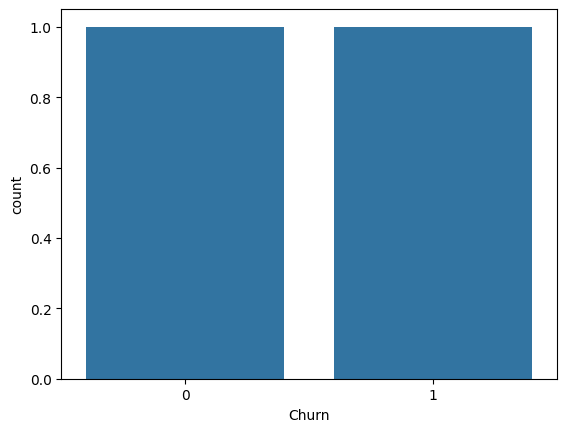

In [ ]:
import seaborn as sns
sns.countplot(x)
